![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:

SELECT * 
FROM students;

SyntaxError: invalid syntax (3428564307.py, line 1)

In [ ]:
SELECT 
	stay AS stay, 
	COUNT(*) AS count_int,
	round(AVG(todep),2) AS average_phq, 
	round(AVG(tosc),2) AS average_scs, 
	round(AVG(toas),2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC
LIMIT 9;

In [ ]:
INNER JOIN
SELECT alias.columns... 
FROM table as alias 
inner join table 2 as alias 
using(common column)
where aslias.columns = 'x'

In [ ]:
SELECT c.name AS country, l.name AS language
FROM countries AS c
INNER JOIN languages AS l
USING(code)
WHERE l.name = 'Bhojpuri';

###### Multiple inner join 

In [ ]:
-- Select fields
SELECT name, e.year, fertility_rate, e.unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
-- Join to economies (as e)
INNER JOIN economies as e 
-- Match on country code
ON c.code = e.code;

###### Join en otra columna

In [ ]:
SELECT name, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code
-- Add an additional joining condition such that you are also joining on year
	AND e.year = p.year;

###### CROSS JOIN crea todas las posibles combinaciones, es como un for loop iterado 

###### Self Join explica jerarquia de datos como empleados y sus gerentes, paises y sus continentes

######  INNER JOIN

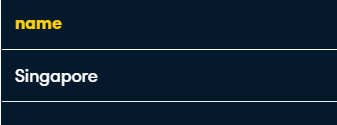

In [ ]:
-- Return all cities with the same name as a country
SELECT name
FROM cities
INTERSECT
SELECT name
FROM countries;

###### EXCEPT
están en la tabla izquierda pero no en la derecha
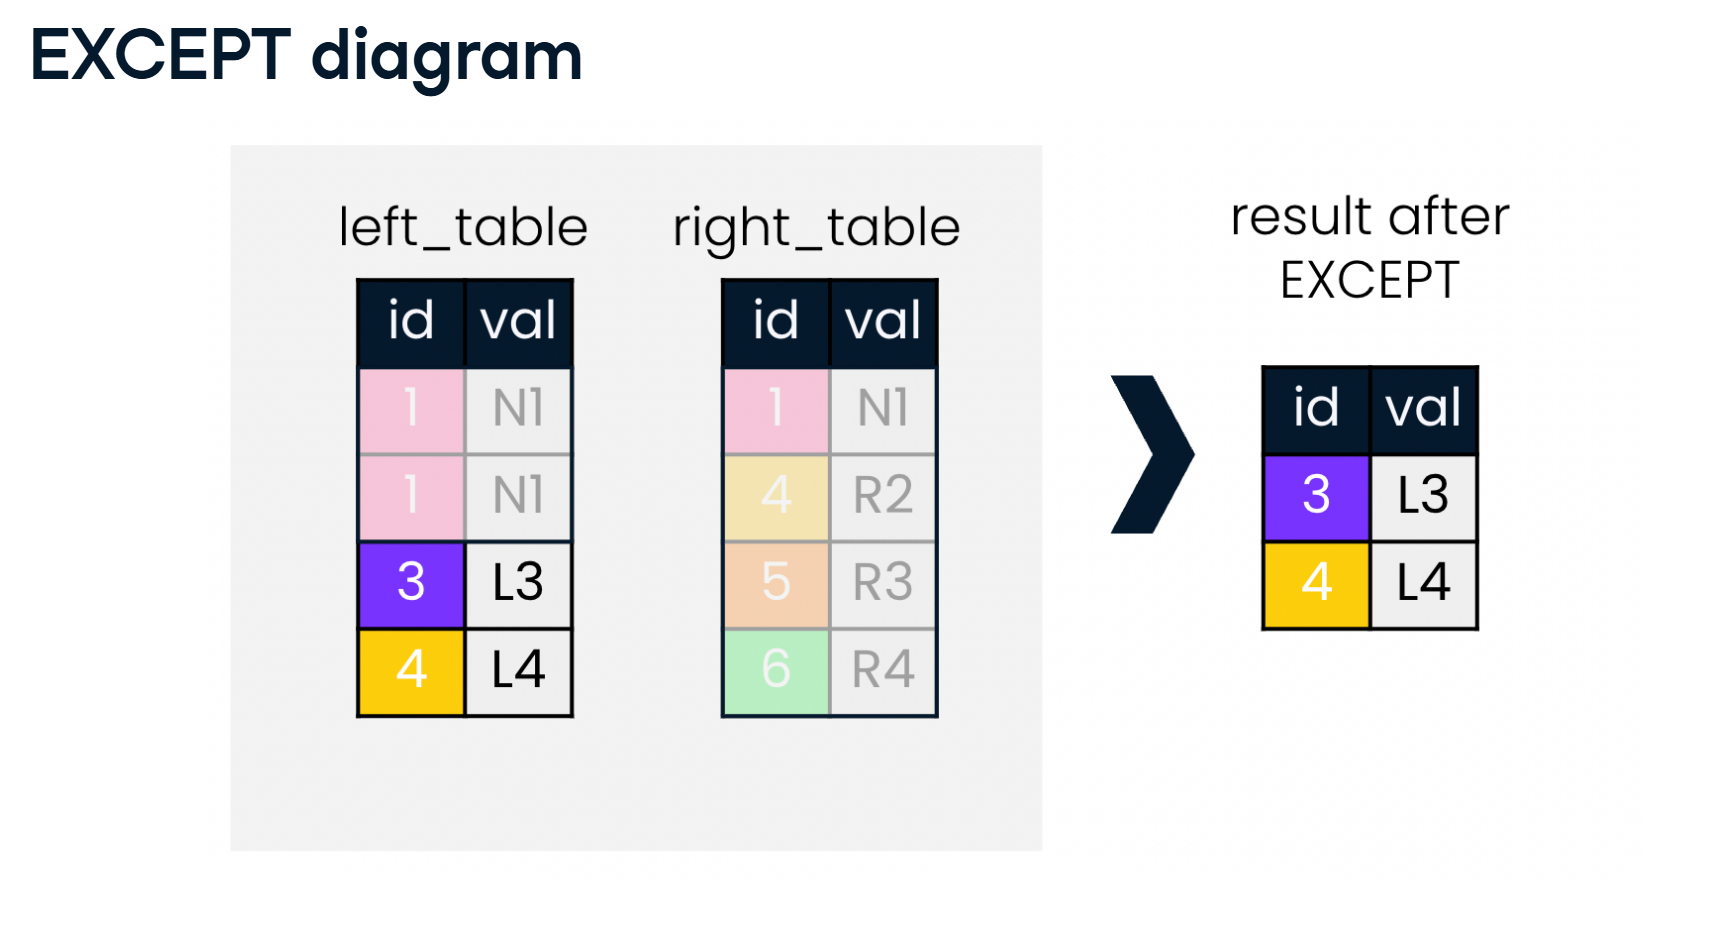

###### Semi Join
Regresa valores de la primer tabla donde se cumple una condición de la segunda tabla
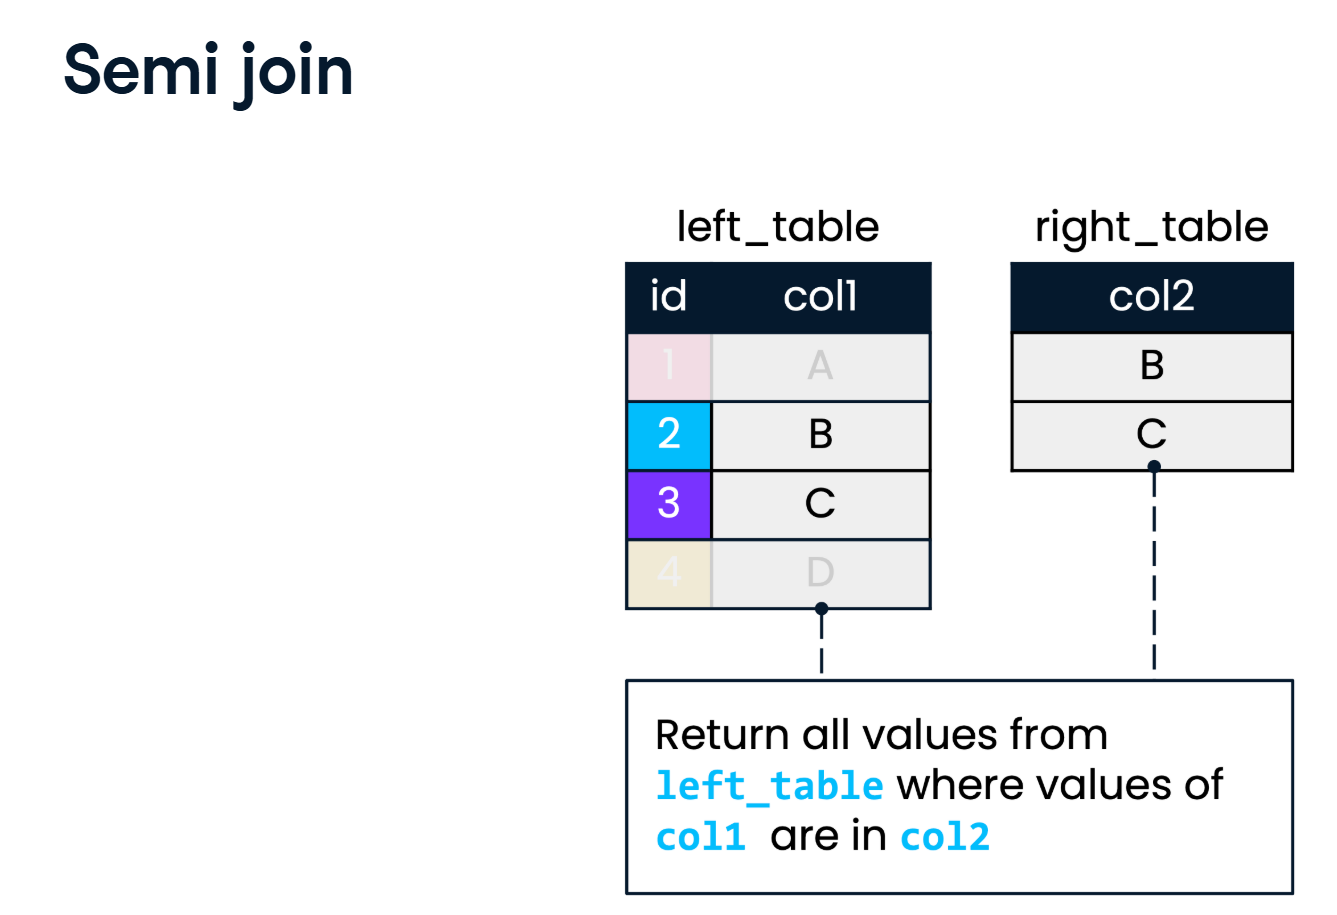

###### Anti Joins 
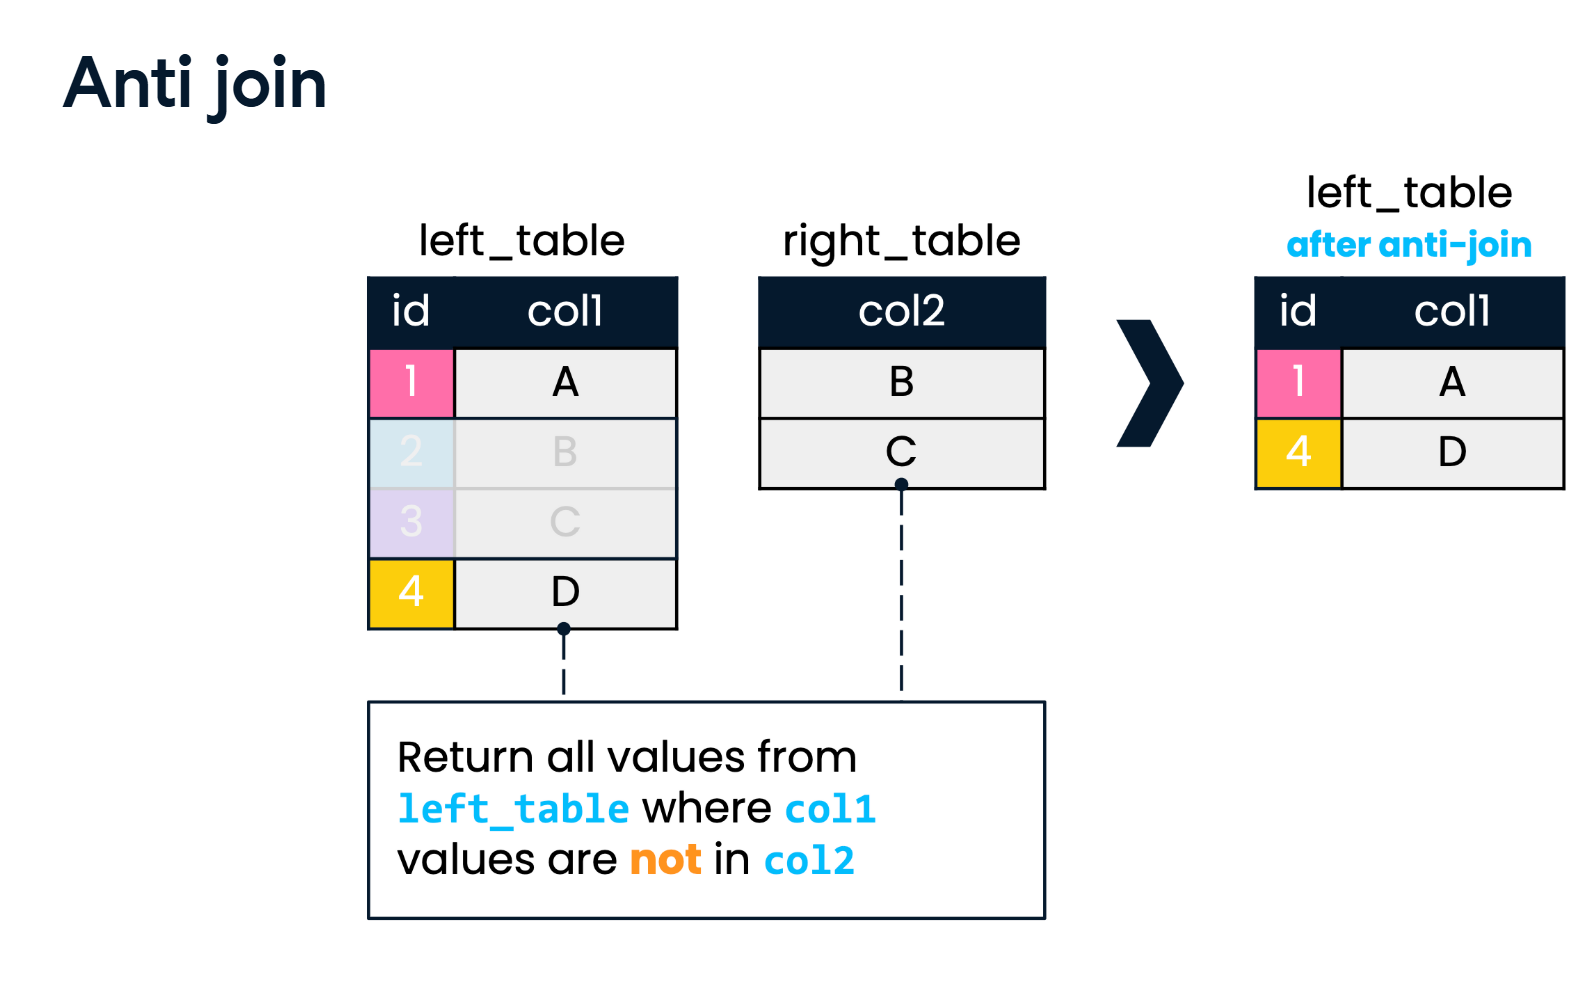

In [ ]:
-- Select matches where Barcelona was the away team
SELECT  
	m.date,
	t.team_long_name AS opponent,
	CASE WHEN m.home_goal < m.away_goal THEN 'Barcelona win!'
        WHEN m.home_goal > m.away_goal THEN 'Barcelona loss :(' 
        ELSE 'Tie' END AS outcome
FROM matches_spain AS m
-- Join teams_spain to matches_spain
LEFT JOIN teams_spain AS t 
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id = 8634;

In [ ]:
-- Select the season and date columns
SELECT 
	season,
	date,
    -- Identify when Bologna won a match
	CASE WHEN hometeam_id = 9857 
        AND home_goal > away_goal 
        THEN 'Bologna Win'
		WHEN awayteam_id = 9857 
        AND away_goal > home_goal 
        THEN 'Bologna Win' 
		END AS outcome
FROM matches_italy;

In [ ]:
-- Select the season, date, home_goal, and away_goal columns
SELECT 
	season,
    date,
	home_goal,
	away_goal
FROM matches_italy
WHERE 
-- Exclude games not won by Bologna
	CASE WHEN hometeam_id = 9857 AND home_goal > away_goal THEN 'Bologna Win'
		WHEN awayteam_id = 9857 AND away_goal > home_goal THEN 'Bologna Win' 
		END IS NOT NULL;

In [ ]:
SELECT 
	c.name AS country,
    -- Sum the total records in each season where the home team won
	SUM(CASE WHEN m.season = '2012/2013' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2012_2013,
 	SUM(CASE WHEN m.season = '2013/2014' AND m.home_goal > m.away_goal
        THEN 1 ELSE 0 END) AS matches_2013_2014,
 	SUM(CASE WHEN m.season = '2014/2015' AND m.home_goal > m.away_goal
        THEN 1 ELSE 0 END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
GROUP BY country;

In [ ]:
SELECT 
	c.name AS country,
    -- Round the percentage of tied games to 2 decimal points
	ROUND(AVG(CASE WHEN m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2013_2014,
	ROUND(AVG(CASE WHEN m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2014/2015' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

######  Una subquery (o subconsulta) es una consulta anidada dentro de otra consulta. Se escribe entre paréntesis y su resultado es utilizado por la consulta principal. Las subqueries pueden aparecer en varias partes de una consulta, como en el SELECT, FROM, o WHER
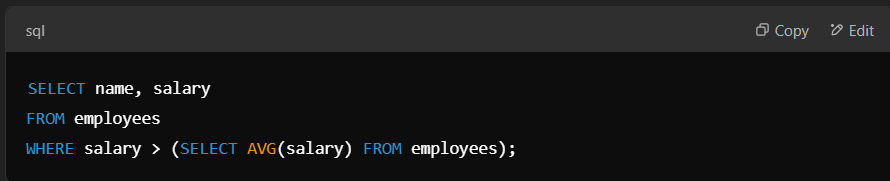

In [ ]:
SELECT 
	-- Select the team long and short names
	team_long_name,
	team_short_name
FROM team 
-- Exclude all values from the subquery
WHERE team_api_id NOT IN
     (SELECT DISTINCT hometeam_ID  FROM match);

In [ ]:
SELECT
	-- Select the team long and short names
	team_long_name,
	team_short_name
FROM team
-- Filter for teams with 8 or more home goals
WHERE team_api_id in
	  (SELECT hometeam_id 
       FROM match
       WHERE home_goal >= 8);

# IMPORTANTE
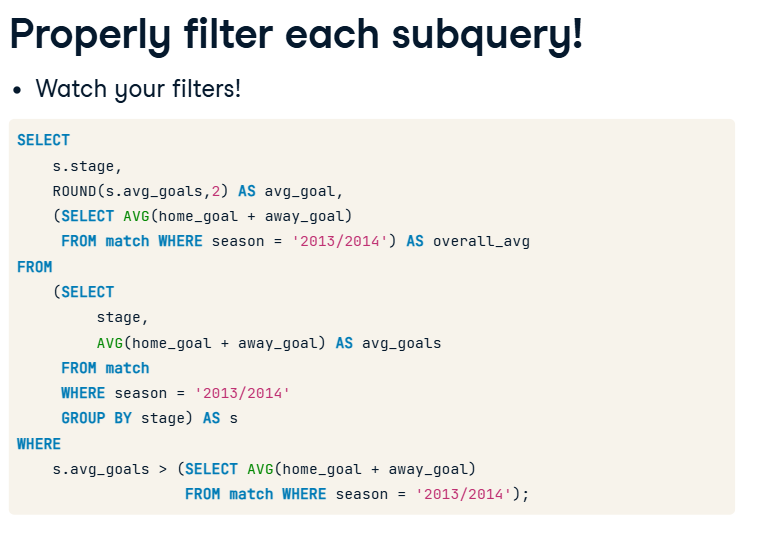
NEcesita el WHERE en las subquerys y fuera del código

###### Las correlated subqueries (subconsultas correlacionadas) son un tipo de subconsulta en SQL en la que la subconsulta hace referencia a las columnas de la consulta principa

In [ ]:
SELECT 
	-- Select country ID, date, home, and away goals from match
	main.country_id,
    main.date,
    main.home_goal, 
    main.away_goal
FROM match AS main
WHERE 
	-- Filter the main query by the subquery
	(home_goal + away_goal) > 
        (SELECT AVG((sub.home_goal + sub.away_goal) * 3)
         FROM match AS sub
         -- Join the main query to the subquery in WHERE
         WHERE main.country_id = sub.country_id);